### Imports and Setup

In [2]:
import pandas as pd
import os
import numpy as np
%matplotlib inline

'''Defining the database's file path'''
notebook_path = os.path.abspath("EE Graphs.ipynb")

data_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\data.csv')
rad_vel_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\rad_vel.csv')
microlensing_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\microlensing.csv')
ttv_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ttv.csv')
imaging_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\imaging.csv')
transit_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\transit.csv')
transit_csv_condensed = os.path.join(os.path.dirname(notebook_path), 'Data Files\\transit_csv_condensed.csv')

ratio = os.path.join(os.path.dirname(notebook_path),'Data Files\\ratio.csv')
extd = os.path.join(os.path.dirname(notebook_path), 'Data Files\\data_max.csv')

all_csv_1 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==1.csv')
all_csv_1_CUT = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==1_CUT.csv')
all_csv_2 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==2.csv')
all_csv_3 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==3.csv')
all_csv_4 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==4.csv')
all_csv_5 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==5.csv')
all_csv_6 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==6.csv')
all_csv_7 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==7.csv')
all_csv_8 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==8.csv')

'''formatting the csv file for pandas DataFrame'''
table = pd.read_csv(data_csv)

'''see what the discovery method options are'''
s = set([])
for line in table.sy_pnum: s.add(line)
print(s)

[sum(element for element in table.pl_bmassj)]

{1, 2, 3, 4, 5, 6, 7, 8}


[nan]

### Radial Velocity Discovery Method
constants: 
- discovery method = radial velocity
- number of stars = 1

In [5]:
'''
Given: Discovery Method = Radial Velocity
Generated: Eccentricity, Mass (Relative to Earth), Mass (Relative to Jupiter), Density, Distance (From Star)
'''

with open(rad_vel_csv,'w') as f1:
        [f1.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmasse)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].pl_dens)+","
                  +str(table.loc[i].sy_dist)+"\n")
         for i,line in enumerate(table.discoverymethod)if line=="Radial Velocity"]
#          and table.loc[i].sy_pnum==1

rad_vel_table = pd.read_csv(rad_vel_csv, names=['eccentricity','mass_e','mass_j','density','dist'])
sample_size = rad_vel_table.index.stop
print(sample_size)

661


Text(0, 0.5, 'Orbital Eccentricity')

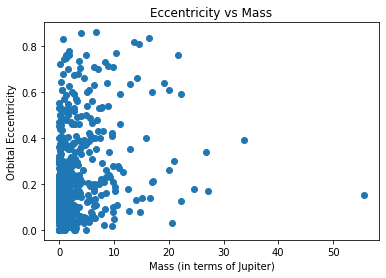

In [6]:
'''Graphing Eccentricity vs Mass for Radial Velocity-Discovered Planets'''
import matplotlib.pyplot as plt

mass_jupiter = plt.scatter(rad_vel_table.mass_j, rad_vel_table.eccentricity)
plt.title("Eccentricity vs Mass")
plt.xlabel("Mass (in terms of Jupiter)")
plt.ylabel("Orbital Eccentricity")

### Imaging Discovery Method
Constants:
- number of stars = 1
- discovery method = imaging

In [59]:
'''
Given: Discovery Method = Imaging
Generated: Eccentricity, Mass (Relative to Earth), Mass (Relative to Jupiter), Density, Distance (From Star)
'''
with open(imaging_csv,'w') as f3:
        [f3.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmasse)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].pl_dens)+","
                  +str(table.loc[i].sy_dist)+"\n")for i,line in enumerate(table.discoverymethod)if line=="Imaging"]
        
imaging_table = pd.read_csv(imaging_csv, names=['eccentricity','mass_e','mass_j','density','dist'])
sample_size = imaging_table.index.stop
print(sample_size)

43


### Transit Discovery Method
Constants:
- number of stars = 1
- discovery method = transit photometry

In [68]:
'''
Given: Discovery Method = Transit
Generated: Eccentricity, Mass (Relative to Earth), Mass (Relative to Jupiter), Density, Distance (From Star)
'''
with open(transit_csv,'w') as f4:
        [f4.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmasse)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].pl_dens)+","
                  +str(table.loc[i].sy_dist)+"\n")for i,line in enumerate(table.discoverymethod)if line=="Transit"]
        
transit_table = pd.read_csv(transit_csv, names=['eccentricity','mass_e','mass_j','density','dist'])
sample_size = transit_table.index.stop
print(sample_size)

3067


Text(0.5, 0, 'Mass (jupiter)')

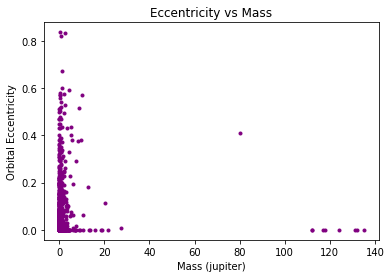

In [84]:
        '''Graphing'''
import matplotlib.pyplot as plt

'''includes outliers (all data points)'''

mass_jupiter = plt.scatter(transit_table.mass_j, transit_table.eccentricity, marker='.',color='purple',label="Mass")
# density = plt.scatter(transit_table.eccentricity,transit_table.density,marker='.',color='orange',label="Density")
# legend = plt.legend(handles=[mass_jupiter,density],loc='upper right')
plt.title("Eccentricity vs Mass")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (jupiter)")

213


Text(0.5, 0, 'Mass (jupiter)')

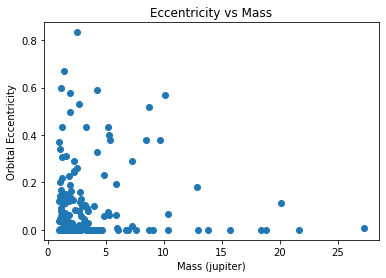

In [83]:
        '''Graphing'''
import matplotlib.pyplot as plt

'''exclude outliers to see the tightly packed distribution around'''

with open(transit_csv_condensed,'w') as f5:
                [f5.write(str(transit_table.loc[i].eccentricity)+","
                  +str(transit_table.loc[i].mass_e)+","
                  +str(transit_table.loc[i].mass_j)+","
                  +str(transit_table.loc[i].density)+","
                  +str(transit_table.loc[i].dist)+"\n")
                  for i,line in enumerate(transit_table.mass_j)if float(line)<40 and float(line)>1]
        
transit_table_condensed = pd.read_csv(transit_csv_condensed, names=['eccentricity','mass_e','mass_j','density','dist'])
sample_size = transit_table_condensed.index.stop
print(sample_size)

mass_jupiter = plt.scatter(transit_table_condensed.mass_j, transit_table_condensed.eccentricity)
plt.title("Eccentricity vs Mass")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (jupiter)")

### Our Solar System
Constsants: 
- solar mass = 2E30 kg
- number of stars = 1
- number of planets in system = 8

9
9


Text(0, 0.5, 'Orbital Eccentricity')

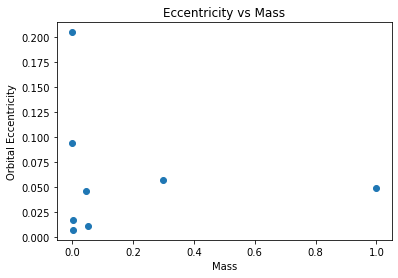

In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

notebook_path = os.path.abspath("EE Graphs.ipynb")
data_extd_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\our_system.csv')

'''formatting the csv file for pandas DataFrame'''
ctable = pd.read_csv(data_extd_csv)

'''see what the discovery method options are'''
s = set([])
for line in ctable.planet_name: s.add(line)
print(len(s))
print(len(ctable.planet_name))

# plt.scatter(ctable.eccentricity, ctable.density)
plt.scatter(ctable.mass_j, ctable.eccentricity)
plt.title("Eccentricity vs Mass")
plt.xlabel("Mass")
plt.ylabel("Orbital Eccentricity")

### Number of Planets in System
Constants:
- number of stars = 1
- per graph: number of planets = n

2218
{1}


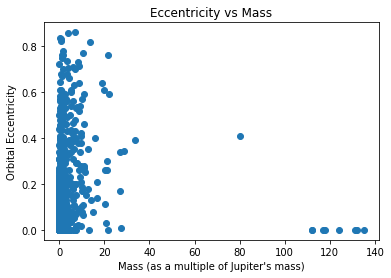

In [62]:
'''Graphing ALL planet types if they are the sole planet in their system'''
import matplotlib.pyplot as plt

with open(all_csv_1,'w') as f6:
                [f6.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].sy_pnum)+"\n")
                  for i,line in enumerate(table.sy_pnum)if float(line)==1]
        
all_table_1 = pd.read_csv(all_csv_1, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_1.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
mass_jupiter = plt.scatter(all_table_1.mass_j, all_table_1.eccentricity)
plt.title("Eccentricity vs Mass")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_1.sys_planet_num:s.add(num)
print(s)

914
{2}


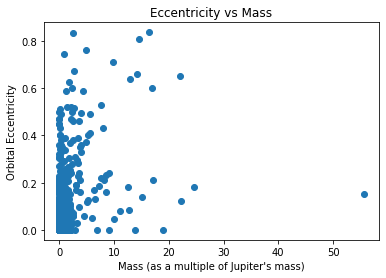

In [39]:
'''Graphing ALL planet types if they are the one of two planets in their system'''
import matplotlib.pyplot as plt

with open(all_csv_2,'w') as f7:
                [f7.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].sy_pnum)+"\n")
                  for i,line in enumerate(table.sy_pnum)if float(line)==2]
        
all_table_2 = pd.read_csv(all_csv_2, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_2.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
mass_jupiter = plt.scatter(all_table_2.mass_j, all_table_2.eccentricity)
plt.title("Eccentricity vs Mass")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_2.sys_planet_num:s.add(num)
print(s)

426
{3}


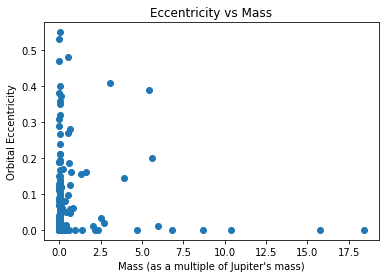

In [41]:
'''Graphing ALL planet types if they are the one of three planets in their system'''
import matplotlib.pyplot as plt

with open(all_csv_3,'w') as f8:
                [f8.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].sy_pnum)+"\n")
                  for i,line in enumerate(table.sy_pnum)if float(line)==3]
        
all_table_3 = pd.read_csv(all_csv_3, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_3.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
mass_jupiter = plt.scatter(all_table_3.mass_j, all_table_3.eccentricity)
plt.title("Eccentricity vs Mass")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_3.sys_planet_num:s.add(num)
print(s)

204
{4}


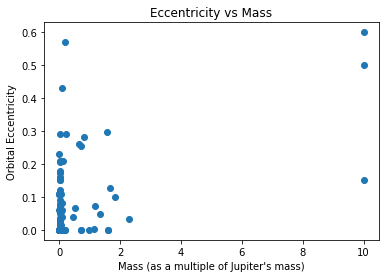

In [43]:
'''Graphing ALL planet types if they are the one of three planets in their system'''
import matplotlib.pyplot as plt

with open(all_csv_4,'w') as f9:
                [f9.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].sy_pnum)+"\n")
                  for i,line in enumerate(table.sy_pnum)if float(line)==4]
        
all_table_4 = pd.read_csv(all_csv_4, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_4.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
mass_jupiter = plt.scatter(all_table_4.mass_j, all_table_4.eccentricity)
plt.title("Eccentricity vs Mass")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_4.sys_planet_num:s.add(num)
print(s)

100
{5}


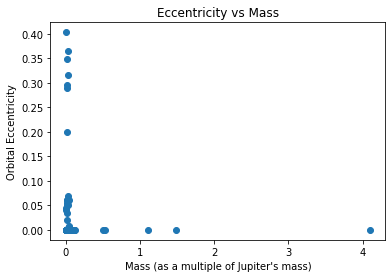

In [48]:
'''Graphing ALL planet types if they are the one of three planets in their system'''
import matplotlib.pyplot as plt

with open(all_csv_5,'w') as f10:
                [f10.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].sy_pnum)+"\n")
                  for i,line in enumerate(table.sy_pnum)if float(line)==5]
        
all_table_5 = pd.read_csv(all_csv_5, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_5.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
mass_jupiter = plt.scatter(all_table_5.mass_j, all_table_5.eccentricity)
plt.title("Eccentricity vs Mass")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_5.sys_planet_num:s.add(num)
print(s)

30
{6}


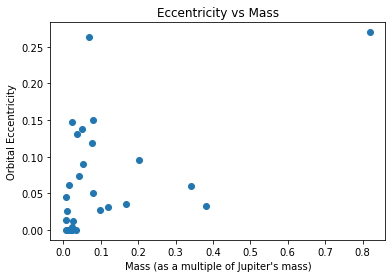

In [47]:
'''Graphing ALL planet types if they are the one of three planets in their system'''
import matplotlib.pyplot as plt

with open(all_csv_6,'w') as f11:
                [f11.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].sy_pnum)+"\n")
                  for i,line in enumerate(table.sy_pnum)if float(line)==6]
        
all_table_6 = pd.read_csv(all_csv_6, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_6.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
mass_jupiter = plt.scatter(all_table_6.mass_j, all_table_6.eccentricity)
plt.title("Eccentricity vs Mass")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_6.sys_planet_num:s.add(num)
print(s)

7
{7}


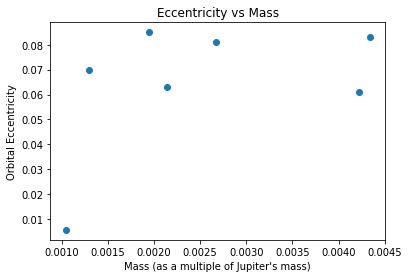

In [46]:
'''Graphing ALL planet types if they are the one of three planets in their system'''
import matplotlib.pyplot as plt

with open(all_csv_7,'w') as f12:
                [f12.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].sy_pnum)+"\n")
                  for i,line in enumerate(table.sy_pnum)if float(line)==7]
        
all_table_7 = pd.read_csv(all_csv_7, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_7.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
mass_jupiter = plt.scatter(all_table_7.mass_j, all_table_7.eccentricity)
plt.title("Eccentricity vs Mass")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_7.sys_planet_num:s.add(num)
print(s)

8
{8}


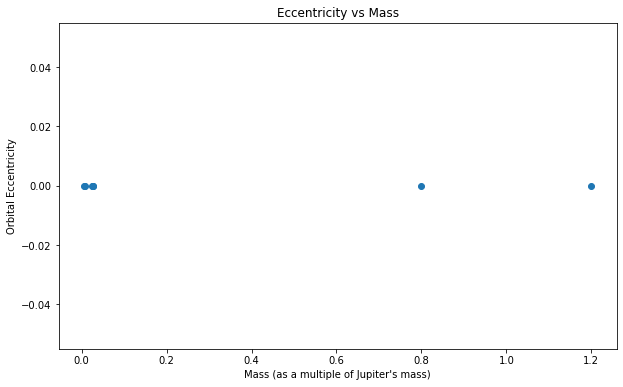

In [25]:
'''Graphing ALL planet types if they are the one of three planets in their system'''
import matplotlib.pyplot as plt

with open(all_csv_8,'w') as f13:
                [f13.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].sy_pnum)+"\n")
                  for i,line in enumerate(table.sy_pnum)if float(line)==8]
        
all_table_8 = pd.read_csv(all_csv_8, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_8.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
mass_jupiter = plt.scatter(all_table_8.mass_j, all_table_8.eccentricity)
plt.title("Eccentricity vs Mass")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

'''Check to make sure that filtering worked and all planets are the sole members of their planetary system'''
s = set([])
for num in all_table_8.sys_planet_num:s.add(num)
print(s)

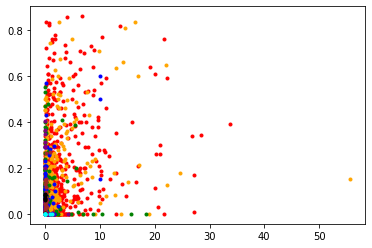

In [71]:
'''Combined All 'ALL' graphs: layered'''

plt.scatter(all_table_1_CUT.mass_j, all_table_1_CUT.eccentricity, marker='.', color='red')
plt.scatter(all_table_2.mass_j, all_table_2.eccentricity, marker='.', color='orange')
plt.scatter(all_table_3.mass_j, all_table_3.eccentricity, marker='.', color='green')
plt.scatter(all_table_4.mass_j, all_table_4.eccentricity, marker='.', color='blue')
plt.scatter(all_table_5.mass_j, all_table_5.eccentricity, marker='.', color='purple')
plt.scatter(all_table_6.mass_j, all_table_6.eccentricity, marker='.', color='brown')
plt.scatter(all_table_7.mass_j, all_table_7.eccentricity, marker='.', color='black')
plt.scatter(all_table_8.mass_j, all_table_8.eccentricity, marker='.', color='cyan')

### All Planets
Constants:
- number of planets = 1

Text(0, 0.5, 'Orbital Eccentricity')

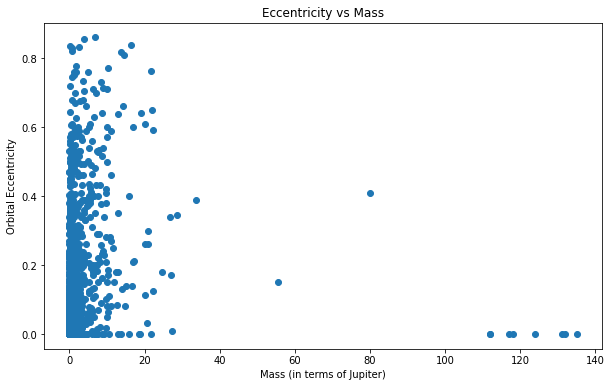

In [24]:
'''ALL PLANETS'''
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
fig = plt.scatter(table.pl_bmassj, table.pl_orbeccen)
plt.title("Eccentricity vs Mass")
plt.xlabel("Mass (in terms of Jupiter)")
plt.ylabel("Orbital Eccentricity")
